# Seaborn plots

Seaborn is a popular Python data visualization library based on Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn is built on top of Matplotlib and integrates well with Pandas data structures, making it an excellent choice for data visualization and exploration tasks [Waskom, 2021].
Key features of Seaborn:

1. **High-level interface**: Seaborn allows you to create complex visualizations with just a few lines of code, making it easy to explore and communicate insights from your data.

2. **Attractive default styles**: Seaborn comes with visually appealing default styles, which makes your plots look great right out of the box.

3. **Support for statistical plots**: Seaborn includes a variety of statistical plots, such as scatter plots, line plots, bar plots, box plots, violin plots, heatmaps, and more. These plots often include informative summaries of data distribution and relationships.

4. **Integration with Pandas**: Seaborn works seamlessly with Pandas DataFrames, allowing you to easily visualize and analyze your data.

5. **Color palettes**: Seaborn provides a range of color palettes, including categorical, sequential, and diverging, making it easy to customize the appearance of your visualizations.

6. **Facet grids**: Seaborn supports the creation of facet grids, allowing you to create multiple plots, each showing a different subset of the data, based on one or more categorical variables.

Seaborn is a Python data visualization library based on Matplotlib that provides a higher-level interface for creating attractive and informative statistical graphics. It simplifies the process of creating various types of plots while offering enhanced aesthetics and better support for working with structured data.

Here are some examples from these commonly used Seaborn plots:

## Line Plot

A line plot is a common type of data visualization that displays data points connected by straight lines [Waskom, 2021]. It is particularly useful for visualizing trends, changes over time, and the relationship between two numerical variables. Seaborn's `sns.lineplot()` function allows you to create line plots with ease, and it provides various options for customization. Here's an explanation of how to use `sns.lineplot()`:

1. **Usage**: Line plots are used to show the trend or progression of a variable over a continuous axis, such as time, while connecting the data points to visualize the overall pattern or trajectory.

2. **Seaborn Library**: Seaborn is a Python data visualization library built on Matplotlib. `sns.lineplot()` is part of Seaborn's collection of plot functions.

3. **Syntax**: The basic syntax for creating a line plot with Seaborn is: `sns.lineplot(x, y, data, hue, style, markers)`. Here, `x` and `y` are the variables to be plotted on the x-axis and y-axis, respectively. `data` is the DataFrame containing the data, and `hue`, `style`, and `markers` (all optional) allow you to differentiate lines based on categorical variables and customize the appearance of the lines and data points. You can see the full function descrition [here](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

4. **Line Plot Features**:
   - **Line Connection**: The main feature of a line plot is that it connects the data points with straight lines, emphasizing the trend or pattern in the data.
   - **Coloring (Hue)**: The `hue` parameter allows you to color the lines based on a categorical variable, making it easier to distinguish different groups or categories in the data.
   - **Styling (Style)**: The `style` parameter lets you customize the line styles (e.g., solid, dashed, dotted) based on a categorical variable, providing additional information.
   - **Markers**: You can add markers (e.g., circles, triangles) at the data points using the `markers` parameter, making it easier to identify individual data points on the line.

5. **Customization**: Seaborn provides various customization options, such as setting plot aesthetics (line colors, styles, marker types), adding labels and titles, adjusting axis limits, and more.

6. **Interpretation**: When interpreting a line plot, focus on the overall trend of the line any significant changes or inflection points, the relative behavior of different lines (if using `hue`), and the variability or dispersion of the data points around the line.

7. **Data Preparation**: Ensure that the data is properly organized and relevant for the line plot. Handle missing values and ensure that the variables being plotted on the x-axis and y-axis are suitable for a line plot (typically numerical variables).

<font color='Blue'><b>Example:</b></font> The dataset was obtained from [https://data.calgary.ca/stories/s/9phu-xb4j](https://data.calgary.ca/stories/s/9phu-xb4j) and pertains to Water Temperature (in degrees Celsius) at the Fish Creek 37th St Calgary Station (SUR_FC-37).

**Description of the Dataset Columns:**

1. **Date:** The date and time corresponding to each temperature measurement.
2. **Water Temperature:** The recorded water temperature in degrees Celsius (°C).

In [1]:
# Import the Pandas library as 'pd' for data manipulation
import pandas as pd

# Read a CSV file ('Fish_Creek_Water_Temp.csv') and select specific columns
# - 'usecols' specifies the columns to be included in the DataFrame.
#   In this case, we select 'Date' and 'Water Temperature.'
df_Water_Temp = pd.read_csv('https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Datasets/Fish_Creek_Water_Temp.csv',
                            usecols = ['Date', 'Water Temperature'])

# Convert the 'Date' column to a datetime format
# This step is important for handling date-related operations.
df_Water_Temp['Date'] = pd.to_datetime(df_Water_Temp['Date'])

# Display the first few rows of the DataFrame to inspect the data
# This helps us verify the data and check if the datetime conversion was successful.
display(df_Water_Temp.head())

,Date,Water Temperature
0,2021-11-01 09:35:00,0.6
1,2021-12-06 09:13:00,1.5
2,2022-02-07 09:22:00,1.7
3,2022-01-03 10:33:00,1.4
4,2022-05-02 09:31:00,7.7


In [2]:
# Set the 'Date' column as the index of the DataFrame
# This allows for time-based indexing and analysis.
df_Water_Temp.set_index('Date', inplace=True)

# Calculate the monthly average water temperature
# - 'resample('MS')' groups the data by month and calculates the mean.
# - 'mean()' computes the average water temperature for each month.
# - 'reset_index(drop=False)' resets the index while keeping the 'Date' column.
monthly_avg_temperature = df_Water_Temp['Water Temperature'].resample('MS').mean().reset_index(drop=False)

# Display the first few rows of the resulting DataFrame
# This shows the calculated monthly average water temperatures.
display(monthly_avg_temperature.head())

,Date,Water Temperature
0,2000-01-01,0.0
1,2000-02-01,1.5
2,2000-03-01,-1.0
3,2000-04-01,15.0
4,2000-05-01,9.3


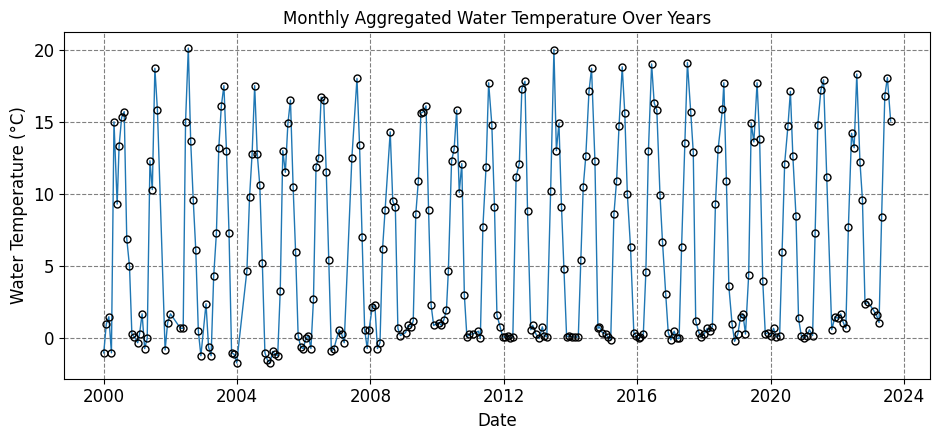

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Use a custom style for the plot (adjust the path to your style file)
plt.style.use('https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Files/mystyle.mplstyle')

# Create a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(9.5, 4.5))

# Create a line plot with markers
# - 'x' is set to 'Date,' and 'y' is set to 'Water Temperature' to define the data.
# - 'data' specifies the DataFrame to use for plotting.
# - 'marker' defines the marker style for data points.
# - 'markerfacecolor' sets the color of the marker face to None (no fill).
# - 'ax' specifies the axes where the plot should be drawn.
# - 'markersize' sets the size of the markers.
# - 'markeredgecolor' defines the color of the marker edges.
# - 'markeredgewidth' sets the width of the marker edges.
sns.lineplot(x='Date', y='Water Temperature',
             data=df_Water_Temp,
             marker='o',
             markerfacecolor='None',
             ax=ax,
             markersize=5,
             markeredgecolor='k',
             markeredgewidth=1)

# Set labels and title for the plot
ax.set(xlabel='Date', ylabel='Water Temperature (°C)',
       title='Monthly Aggregated Water Temperature Over Years')

# Display grid lines for better visualization
ax.grid(True)

# Adjust the plot layout for better presentation
plt.tight_layout()

## Scatter Plot

A scatter plot [Waskom, 2021] is a fundamental visualization in data analysis that displays individual data points as dots in a two-dimensional space, with one variable plotted on the x-axis and another on the y-axis. Seaborn's `sns.scatterplot()` is a function used to create scatter plots, and it offers several useful features for customizing the appearance of the plot. Here's an explanation of how to use `sns.scatterplot()`:

1. **Usage**: Scatter plots are used to visualize the relationship between two numerical variables, allowing you to identify patterns, trends, clusters, correlations, and outliers.

2. **Seaborn Library**: Seaborn is a Python data visualization library that provides a high-level interface for creating informative and aesthetically pleasing plots. `sns.scatterplot()` is part of Seaborn's toolkit.

3. **Syntax**: The basic syntax for creating a scatter plot with Seaborn is: `sns.scatterplot(x, y, data, hue, size, style)`. Here, `x` and `y` are the variables to be plotted on the x-axis and y-axis, respectively. `data` is the DataFrame containing the data, and `hue`, `size`, and `style` (all optional) allow you to add additional dimensions by coloring, sizing, and styling the data points based on categorical variables. You can see the full function descrition [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

4. **Scatter Plot Features**:
   - **Data Points**: Each data point is represented as a dot on the plot, with its position determined by the values of the two variables being compared.
   - **Transparency**: When data points overlap, scatter plots can benefit from transparency, allowing you to see the density of points in congested regions.
   - **Coloring (Hue)**: You can use the `hue` parameter to color the data points based on a categorical variable, making it easier to distinguish different groups or categories.
   - **Sizing (Size)**: The `size` parameter allows you to adjust the size of the data points based on a numerical variable, which can help emphasize the significance or quantity associated with each data point.
   - **Styling (Style)**: The `style` parameter lets you apply different marker styles to the data points based on a categorical variable, adding an extra dimension of information.

5. **Customization**: Seaborn provides various customization options, such as setting plot aesthetics (colors, markers, line styles), adding labels and titles, adjusting axis limits, and more.

6. **Interpretation**: When interpreting a scatter plot, observe the overall trend of the data points (linear, nonlinear, no trend), the spread or concentration of points, the relationship between the variables, any clustering or grouping, and the presence of outliers.

7. **Data Preparation**: Ensure that the data is cleaned and relevant for the scatter plot. Handle missing values and ensure that the variables being compared are suitable for a scatter plot (typically numerical variables).

<font color='Blue'><b>Example:</b></font> In this example, we use [Average Weekly Earnings (including overtime), Alberta](https://open.alberta.ca/dataset/average-weekly-earnings-including-overtime-alberta). Average weekly earnings result from dividing total weekly income by the employee count, encompassing overtime pay and excluding unclassified businesses. Data is based on gross taxable payroll before deductions and available annually on the OSI website.

In [4]:
# Import the Pandas library for data manipulation
import pandas as pd

# Define the URL of the CSV data source
link = 'https://open.alberta.ca/dataset/948bc949-7c3d-428f-981d-6d8cca837de4/resource/9dadafb7-bd66-4dc2-afc4-c44f8edd1b71/download/stc_table-14-10-0223-01_average_weekly_earnings_monthly_csv_23-08-31.csv'

# Read the CSV data from the provided link
# - 'usecols' specifies the columns to include in the DataFrame.
df_weekly_earnings = pd.read_csv(link,
                                 usecols=['Reference_Date', 'Geography', 'Industry', 'Average_Weekly_Earnings'])
display(df_weekly_earnings)

,Reference_Date,Geography,Industry,Average_Weekly_Earnings
0,2001/01,Alberta,Accommodation and food services [72],$274.66
1,2001/02,Alberta,Accommodation and food services [72],$264.74
2,2001/03,Alberta,Accommodation and food services [72],$261.44
3,2001/04,Alberta,Accommodation and food services [72],$261.13
4,2001/05,Alberta,Accommodation and food services [72],$255.66
...,...,...,...,...
80482,2023/03,Saskatchewan,Wholesale trade [41],$1449.16
80483,2023/04,Saskatchewan,Wholesale trade [41],$1469.97
80484,2023/05,Saskatchewan,Wholesale trade [41],$1404.25
80485,2023/06,Saskatchewan,Wholesale trade [41],$1403.60


In [5]:
# Convert the 'Reference_Date' column to datetime format with the specified format
# This step is crucial for working with date-based data.
df_weekly_earnings['Reference_Date'] = pd.to_datetime(df_weekly_earnings['Reference_Date'], format='%Y/%m')

# Remove the dollar signs ('$') from the 'Average_Weekly_Earnings' column and convert it to float
# This prepares the column for numerical analysis.
df_weekly_earnings['Average_Weekly_Earnings'] = df_weekly_earnings['Average_Weekly_Earnings']\
                                              .str.replace('$', '', regex=False).astype(float)

# Remove text within square brackets in the 'Industry' column
# This step cleans the 'Industry' column by removing text within square brackets.
df_weekly_earnings['Industry'] = df_weekly_earnings['Industry'].str.replace(r'\s*\[[^\]]+\]', '', regex=True)

# Display the resulting DataFrame after pre-processing
# This provides a glimpse of the data with applied transformations.
display(df_weekly_earnings)

,Reference_Date,Geography,Industry,Average_Weekly_Earnings
0,2001-01-01,Alberta,Accommodation and food services,274.66
1,2001-02-01,Alberta,Accommodation and food services,264.74
2,2001-03-01,Alberta,Accommodation and food services,261.44
3,2001-04-01,Alberta,Accommodation and food services,261.13
4,2001-05-01,Alberta,Accommodation and food services,255.66
...,...,...,...,...
80482,2023-03-01,Saskatchewan,Wholesale trade,1449.16
80483,2023-04-01,Saskatchewan,Wholesale trade,1469.97
80484,2023-05-01,Saskatchewan,Wholesale trade,1404.25
80485,2023-06-01,Saskatchewan,Wholesale trade,1403.60


**Note:** The regular expression, '\s*\[[^\]]+\]', can be explained as follows:

1. '\s*' - This part matches zero or more whitespace characters. '\s' represents whitespace (spaces, tabs, etc.), and '*' indicates zero or more occurrences of the preceding element.

2. '\[' - This matches an opening square bracket '[' character. Since square brackets are special characters in regular expressions, they need to be escaped with a backslash '\[' to match the literal character.

3. '[^\]]+' - This portion matches one or more characters that are not the closing square bracket ']'. '[^\]]' is a character class that matches any character except ']'. The '+' indicates one or more occurrences of such characters.

4. '\]' - This matches the closing square bracket ']' character. Again, it needs to be escaped with a backslash '\]' to match the literal character.

In [6]:
# Import the Pandas library for data manipulation
import pandas as pd

# Filter the DataFrame to include data only for the 'Alberta' region
df_weekly_earnings_AB5 = df_weekly_earnings.loc[df_weekly_earnings['Geography'] == 'Alberta']

# Filter the DataFrame to include data only from January 2022 onwards
# This step focuses on a specific time period for analysis.
df_weekly_earnings_AB5 = df_weekly_earnings_AB5.loc[df_weekly_earnings_AB5['Reference_Date'] >= '2022-01-01']

# Find the top five industries with the highest average weekly earnings
# - 'groupby' groups the data by 'Industry.'
# - 'mean()' calculates the mean of 'Average_Weekly_Earnings' within each group.
# - 'sort_values()' sorts the groups by mean values in ascending order.
# - '[:5]' selects the top five industries.
top_five = df_weekly_earnings_AB5.groupby(['Industry'])['Average_Weekly_Earnings'].mean().sort_values()[:5].index.tolist()

# Filter the DataFrame to include data only for the top five industries
# This narrows down the dataset to focus on the most relevant industries.
df_weekly_earnings_AB5 = df_weekly_earnings_AB5.loc[df_weekly_earnings_AB5['Industry'].isin(top_five)].reset_index(drop=True)

# Display the resulting DataFrame
# This shows the filtered data with the top five industries.
display(df_weekly_earnings_AB5)

,Reference_Date,Geography,Industry,Average_Weekly_Earnings
0,2022-01-01,Alberta,Accommodation and food services,465.82
1,2022-02-01,Alberta,Accommodation and food services,472.64
2,2022-03-01,Alberta,Accommodation and food services,485.84
3,2022-04-01,Alberta,Accommodation and food services,501.45
4,2022-05-01,Alberta,Accommodation and food services,492.56
...,...,...,...,...
90,2023-03-01,Alberta,Trade,967.78
91,2023-04-01,Alberta,Trade,975.87
92,2023-05-01,Alberta,Trade,968.53
93,2023-06-01,Alberta,Trade,955.96


Here's a breakdown of the key steps:

1. Filtering for Alberta Data:
   - It creates a new DataFrame 'df_weekly_earnings_AB5' by filtering the original DataFrame 'df_weekly_earnings' to include data only for the 'Geography' column with the value 'Alberta.' This step isolates data specific to Alberta.

1. Filtering for Data from January 2022 Onwards:
   - The script further narrows down the 'df_weekly_earnings_AB5' DataFrame by filtering for data where the 'Reference_Date' is greater than or equal to '2022-01-01.' This step selects data from January 2022 onwards.

1. Finding the Top Five Industries:
   - Using the 'groupby' function, it calculates the mean of 'Average_Weekly_Earnings' for each unique value in the 'Industry' column within the 'df_weekly_earnings_AB5' DataFrame.
   - It then sorts these mean values in ascending order using 'sort_values()' and selects the top five using slicing '[:5].' The result is a list of the top five industries with the highest average weekly earnings.

1. Filtering for Data in the Top Five Industries:
   - The script updates 'df_weekly_earnings_AB5' by filtering it to include data only for the industries found in the 'top_five' list. This step effectively isolates data for the top five industries.

1. Resetting the Index:
   - After filtering, the 'reset_index()' function is used with 'drop=True' to reset the index of 'df_weekly_earnings_AB5' and remove the previous index, resulting in a clean index.

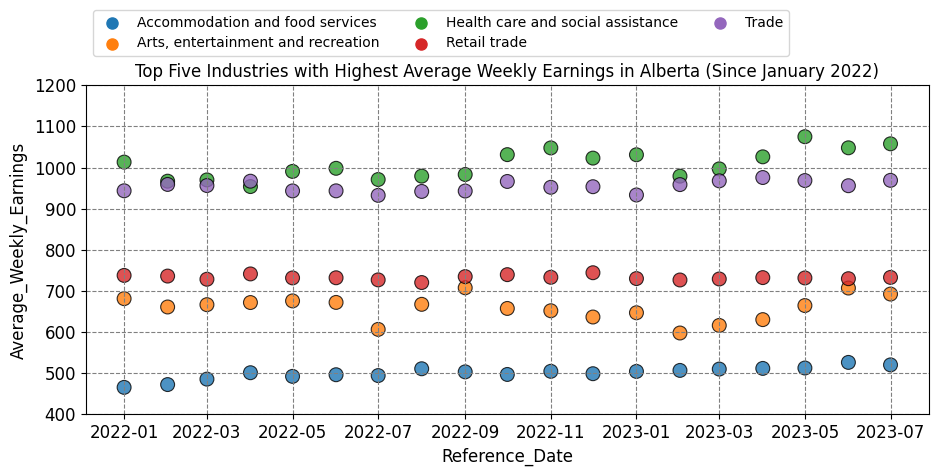

In [7]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes
fig, ax = plt.subplots(figsize=(9.5, 5))  # Create a figure and its associated axes for the plot

# Create a scatter plot with color-coded points
sns.scatterplot(x='Reference_Date', y='Average_Weekly_Earnings', hue='Industry',
                data=df_weekly_earnings_AB5,   # Dataframe containing the data
                palette='tab10',               # Color palette for data points
                ax=ax,                         # Associate this plot with the defined axes
                s=100,                         # Size of data points
                edgecolor='k',                 # Edge color of data points
                alpha=0.8)                     # Transparency of data points

# Set plot title and adjust the y-axis limit
ax.set(title='Top Five Industries with Highest Average Weekly Earnings in Alberta (Since January 2022)',
       ylim=[400, 1200])                       # Setting the y-axis limits for better visualization

# Set the legend outside the plot, on top
legend = ax.legend(loc='upper left', bbox_to_anchor=(0, 1.25), ncols=3)  # Adjusting the legend's position

# Add grid lines below the scatter plot
ax.grid(True)   # Adding grid lines to the plot for reference

# Ensure a tight layout for better visualization
plt.tight_layout()  # Adjusting the layout to prevent clipping of plot elements

## Bar Plot


A bar plot [Waskom, 2021] is a common type of data visualization used to display the distribution of categorical data or the relationship between categorical and numerical variables. Seaborn's `sns.barplot()` function allows you to create bar plots with ease, and it provides options for aggregating data and customizing the appearance of the bars. Here's an explanation of how to use `sns.barplot()`:

1. **Usage**: Bar plots are used to compare the values of different categories, display frequencies or counts of categorical variables, and visualize the relationship between categorical and numerical variables.

2. **Seaborn Library**: Seaborn is a Python data visualization library built on top of Matplotlib. `sns.barplot()` is part of Seaborn's collection of plot functions.

3. **Syntax**: The basic syntax for creating a bar plot with Seaborn is: `sns.barplot(x, y, data, hue, estimator, ci)`. Here, `x` and `y` are the variables to be plotted on the x-axis and y-axis, respectively. `data` is the DataFrame containing the data, and `hue`, `estimator`, and `ci` (all optional) allow you to differentiate bars based on categorical variables, aggregate data, and show confidence intervals around the bars. You can see the full function descrition [here](https://seaborn.pydata.org/generated/seaborn.barplot.html).

4. **Bar Plot Features**:
   - **Bars**: The main feature of a bar plot is the vertical (or horizontal) bars that represent the values of different categories or groups. The height (or width) of the bars corresponds to the aggregated values, such as the mean, count, or sum of a numerical variable within each category.
   - **Coloring (Hue)**: The `hue` parameter allows you to differentiate bars based on a categorical variable, creating grouped bar plots where each group represents a different category.
   - **Aggregation (Estimator)**: The `estimator` parameter specifies the aggregation function to be applied to the data within each category. Common options include "mean," "count," "sum," etc.
   - **Confidence Intervals (ci)**: The `ci` parameter controls whether to display confidence intervals around the bars, providing a visual representation of the uncertainty in the aggregated values.

5. **Customization**: Seaborn provides various customization options, such as setting bar colors, adding labels and titles, adjusting axis limits, and more.

6. **Interpretation**: When interpreting a bar plot, focus on the heights (or widths) of the bars, which represent the values of the data within each category or group. Observe the relative differences between the bars, any patterns or trends, and the variation in the data.

7. **Data Preparation**: Ensure that the data is properly formatted for the bar plot. Handle missing values, encode categorical variables appropriately, and ensure that the variables being plotted on the x-axis and y-axis are suitable for a bar plot.

<font color='Blue'><b>Example:</b></font> Calgary Traffic Incidents dataset, acquired from [here](https://data.calgary.ca/Transportation-Transit/Traffic-Incidents/35ra-9556), provides information about various traffic incidents, including their locations, timestamps, the city quadrant in which they occurred, and a count of incidents at each location.

**Description of the Dataset Columns:**

1. **INCIDENT INFO:** This column provides a brief description of the location of the traffic incident. It typically includes the names of streets or intersections where the incident occurred.

2. **START_DT:** This column indicates the date and time when the traffic incident was reported or occurred. For example, "9/15/2023 8:44" means the incident took place on September 15, 2023, at 8:44 AM.

3. **QUADRANT:** This column specifies the quadrant of the city where the incident occurred. In this context, "NW" stands for Northwest, "SE" for Southeast, and "SW" for Southwest. It helps geographically categorize the incident location within the city.

In [8]:
df_traffic = pd.read_csv('https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Datasets/Traffic_Incidents.csv')
df_traffic.head()

,INCIDENT INFO,START_DT,QUADRANT
0,Berkshire Boulevard and Beddington Boulevard NW,9/15/2023 8:44,NW
1,Heritage Drive and Fairview Drive SE,9/15/2023 8:27,SE
2,Eastbound Glenmore Trail at Deerfoot Trail SE,9/15/2023 7:39,SE
3,4 Avenue and 2 Street SW,9/15/2023 6:52,SW
4,Northbound Barlow Trail at 90 Avenue SE,9/15/2023 6:44,SE


In [9]:
# Group the DataFrame by 'INCIDENT INFO' and calculate the count of each incident
df_Incident_Count = df_traffic.groupby('INCIDENT INFO').size().reset_index(name='Count')

# Sort the incident count DataFrame in descending order by 'Count' column
df_Incident_Count = df_Incident_Count.sort_values(by='Count', ascending=False).head(15)

# Display the top 15 incidents with their respective counts
display(df_Incident_Count)

,INCIDENT INFO,Count
10477,Eastbound Glenmore Trail approaching 14 Street SW,129
15650,Southbound Deerfoot Trail approaching Glenmore...,127
15445,Southbound Crowchild Trail approaching Glenmor...,87
17562,Westbound Glenmore Trail approaching Crowchild...,68
13202,Northbound Deerfoot Trail approaching 17 Avenu...,67
10491,Eastbound Glenmore Trail approaching Deerfoot ...,61
4134,Southbound Deerfoot Trail approaching Glenmor...,58
10486,Eastbound Glenmore Trail approaching Blackfoot...,57
10498,Eastbound Glenmore Trail at 14 Street SW,56
13243,Northbound Deerfoot Trail approaching Peigan T...,53


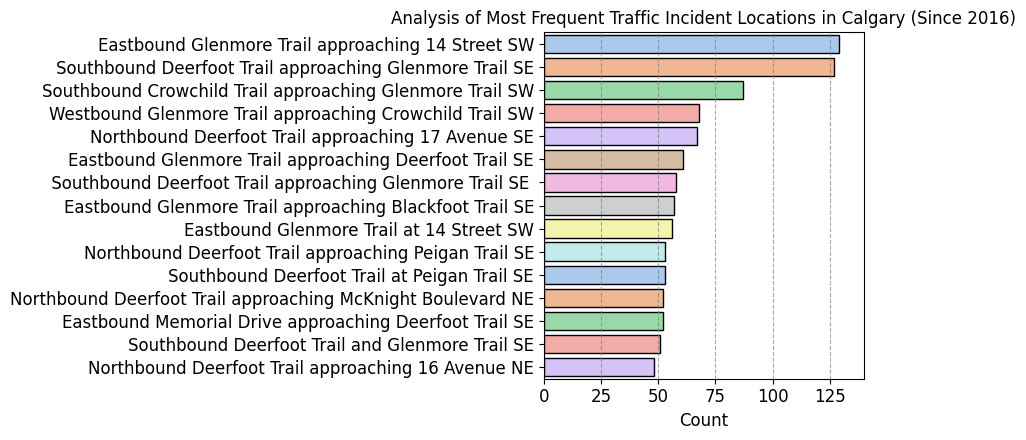

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes for the bar plot
fig, ax = plt.subplots(figsize=(9, 4.5))

# Create a bar plot using seaborn with a pastel color palette
sns.barplot(y='INCIDENT INFO',
            x='Count',
            data=df_Incident_Count,
            palette='pastel',
            ax=ax,
            edgecolor='k')

# Set labels and title for the plot
ax.set(ylabel = '',title='Analysis of Most Frequent Traffic Incident Locations in Calgary (Since 2016)',
      xlim = [0, 140])

# Add grid lines to the x-axis for better visualization
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust the plot layout for better presentation
plt.tight_layout()

In [11]:
# Grouping the DataFrame by 'QUADRANT' and calculating the count of each quadrant
df_Incident_Count = df_traffic.groupby('QUADRANT').size().reset_index(name='Count')

# Sorting the quadrant count DataFrame by the 'QUADRANT' column
df_Incident_Count = df_Incident_Count.sort_values(by='QUADRANT')

# Displaying the quadrant counts
display(df_Incident_Count)

,QUADRANT,Count
0,NE,7209
1,NW,6114
2,SE,8871
3,SW,5726


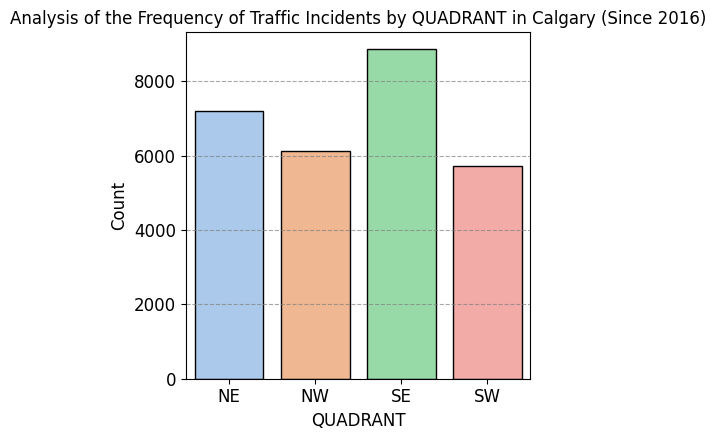

In [12]:
# Import the necessary libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes for the bar plot
fig, ax = plt.subplots(figsize=(4.5, 4.5))

# Generate a bar plot using seaborn with a pastel color palette
sns.barplot(x='QUADRANT',
            y='Count',
            palette='pastel',
            data=df_Incident_Count,
            ax=ax,
            edgecolor='k')

# Set labels and title for the plot
ax.set(title='Analysis of the Frequency of Traffic Incidents by QUADRANT in Calgary (Since 2016)')

# Add grid lines to the y-axis for improved visualization
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust the plot layout for better presentation
plt.tight_layout()

## Histogram


A histogram [Waskom, 2021] is a fundamental data visualization used to represent the distribution of a continuous numerical variable. Seaborn's `sns.histplot()` function is designed to create histograms with ease and provides various options for customization. Here's an explanation of how to use `sns.histplot()`:

1. **Usage**: Histograms are used to understand the underlying frequency distribution of a continuous variable, allowing you to observe the pattern of values and identify central tendencies, dispersion, and potential outliers.

2. **Seaborn Library**: Seaborn is a Python data visualization library that enhances the aesthetics and ease of creating statistical graphics. `sns.histplot()` is part of Seaborn's suite of plot functions.

3. **Syntax**: The basic syntax for creating a histogram with Seaborn is: `sns.histplot(data, x, bins, kde, rug)`. Here, `data` is the DataFrame containing the data, `x` is the numerical variable to be plotted on the x-axis, `bins` specifies the number of bins (intervals) for the histogram, `kde` (optional) controls whether to overlay a kernel density estimate, and `rug` (optional) adds small vertical lines for each data point along the x-axis. You can find the full function description [here](https://seaborn.pydata.org/generated/seaborn.histplot.html).

4. **Histogram Features**:
   - **Bins**: The histogram divides the range of the numerical variable into a set of contiguous intervals called "bins." The height of each bar represents the frequency (or count) of data points falling within each bin.
   - **Kernel Density Estimate (KDE)**: The `kde` parameter can be set to `True` to overlay a smooth density curve (kernel density estimate) on top of the histogram. The KDE provides a smoothed representation of the data's distribution.
   - **Rug Plot**: The `rug` parameter adds small vertical lines (rugs) along the x-axis, indicating the location of individual data points. This can help in visualizing the distribution of data points more precisely.

5. **Customization**: Seaborn provides various customization options for histograms, such as setting the number of bins, adjusting the appearance of the bars, KDE customization, adding labels and titles, and more.

6. **Interpretation**: When interpreting a histogram, focus on the shape of the distribution, the location of the central tendency (mean, median), the spread (variance or standard deviation), the presence of multiple modes (bimodal, multimodal), and any potential outliers.

7. **Data Preparation**: Ensure that the data is properly cleaned and suitable for the histogram. Consider the choice of bin size, and be aware that the appearance of the histogram can change based on the chosen binning strategy.

<font color='Blue'><b>Example:</b></font>

In [13]:
# Import the necessary library for data manipulation
import pandas as pd

# Filter the DataFrame to include data only for the top five industries
# Specifically, we are selecting data related to the 'Health care and social assistance' industry in the province of Alberta.
df_weekly_earnings_health = df_weekly_earnings.loc[
    (df_weekly_earnings['Industry'] == 'Health care and social assistance')  # Filtering by industry code
    & (df_weekly_earnings['Geography'] == 'Alberta')  # Restricting to the province of Alberta
].reset_index(drop=True)  # Resetting the index for the resulting DataFrame

# Display the resulting DataFrame, focusing on health care and social assistance earnings in Alberta
display(df_weekly_earnings_health)

,Reference_Date,Geography,Industry,Average_Weekly_Earnings
0,2001-01-01,Alberta,Health care and social assistance,568.30
1,2001-02-01,Alberta,Health care and social assistance,570.22
2,2001-03-01,Alberta,Health care and social assistance,572.50
3,2001-04-01,Alberta,Health care and social assistance,572.32
4,2001-05-01,Alberta,Health care and social assistance,574.65
...,...,...,...,...
266,2023-03-01,Alberta,Health care and social assistance,996.92
267,2023-04-01,Alberta,Health care and social assistance,1026.17
268,2023-05-01,Alberta,Health care and social assistance,1075.06
269,2023-06-01,Alberta,Health care and social assistance,1048.08


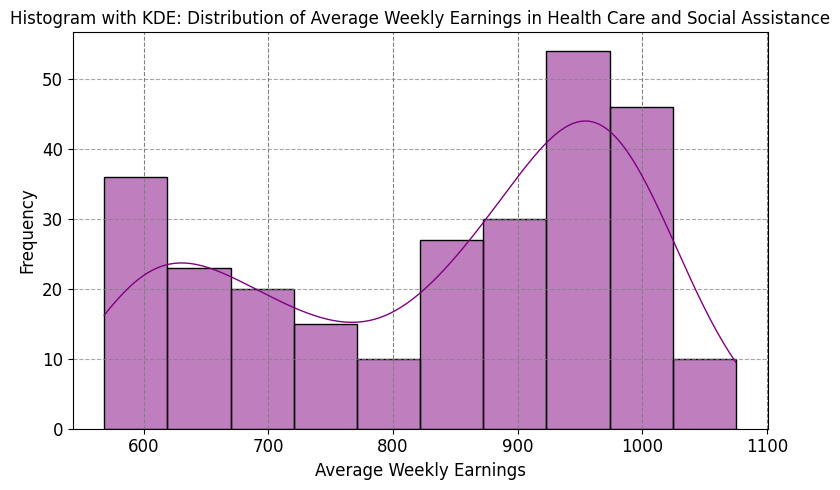

In [14]:
# Import the necessary libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Generate a histogram with a Kernel Density Estimation (KDE) plot
sns.histplot(data=df_weekly_earnings_health,
             x='Average_Weekly_Earnings',
             stat='count',
             bins=10,
             kde=True,  # Include KDE for visualizing the probability density
             color='purple',
             ax=ax,
             edgecolor='k')

# Set labels and title for the plot
ax.set(xlabel='Average Weekly Earnings',  # Label for the x-axis
       ylabel='Frequency',  # Label for the y-axis
       title='Histogram with KDE: Distribution of Average Weekly Earnings in Health Care and Social Assistance')  # Title of the plot

# Add grid lines to enhance visibility along the y-axis
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust the plot layout for better presentation
plt.tight_layout()

Here's a breakdown of the key steps:

1. Creating a Figure and Axes:
   - A figure and axes are created using 'plt.subplots(figsize=(8, 5)).' The 'figsize' parameter sets the size of the figure in inches.

1. Creating a Histogram with KDE Plot:
   - A histogram with a KDE plot is generated using 'sns.histplot().'
   - 'data' is set to 'df_weekly_earnings_health,' specifying the DataFrame containing the data.
   - 'x' is set to 'Average_Weekly_Earnings,' indicating that the 'Average_Weekly_Earnings' column should be represented on the x-axis.
   - 'bins' specifies the number of bins for the histogram, which is set to 10.
   - 'kde=True' adds a Kernel Density Estimation (KDE) plot on top of the histogram to estimate the probability density function.
   - 'color' sets the color of the histogram and KDE plot to 'purple.'
   - 'ax' specifies the axes where the plot should be drawn.
   - 'edgecolor' sets the color of the histogram bin edges.

1. Setting Labels and Title:
   - The 'ax.set()' method is used to set labels for the x and y-axes and provide a title for the plot.
   - 'xlabel' sets the label for the x-axis to 'Average Weekly Earnings.'
   - 'ylabel' sets the label for the y-axis to 'Frequency.'
   - 'title' sets the title of the plot.

1. Adding Grid Lines to the Y-Axis:
   - Grid lines are added to the y-axis using 'ax.yaxis.grid(True, linestyle='--', alpha=0.7).' This helps in better visualizing the data by providing reference lines.

1. Adjusting Plot Layout:
   - 'plt.tight_layout()' is called to ensure a tight layout, improving the plot's appearance by avoiding overlapping elements.

## Box Plot

A box plot [Waskom, 2021] (also known as a whisker plot) is a common data visualization used to depict the distribution and spread of numerical data. It provides insights into the central tendency, variability, and presence of outliers in a dataset. Seaborn's `sns.boxplot()` function is designed to create box plots easily and allows for customization to enhance the visualization. Here's an explanation of how to use `sns.boxplot()`:

1. **Usage**: Box plots are particularly useful for comparing the distribution and spread of numerical data across different categories or groups, identifying potential outliers, and understanding the central tendencies (median, quartiles) of the data.

2. **Seaborn Library**: Seaborn is a Python data visualization library built on top of Matplotlib. `sns.boxplot()` is part of Seaborn's suite of plot functions.

3. **Syntax**: The basic syntax for creating a box plot with Seaborn is: `sns.boxplot(x, y, data, hue)`. Here, `x` (or `y`) is the categorical variable to be plotted on the x-axis (or y-axis), `data` is the DataFrame containing the data, and `hue` (optional) allows you to differentiate box plots based on another categorical variable. You can find the full function description [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

4. **Box Plot Features**:
   - **Box**: The main feature of a box plot is the "box" that represents the interquartile range (IQR), which encompasses the middle 50% of the data. The vertical line inside the box represents the median (50th percentile) of the data.
   - **Whiskers**: Whiskers extend from the box to the minimum and maximum non-outlier data points within a certain range (default is 1.5 times the IQR). Data points outside the whiskers are often considered potential outliers.
   - **Outliers**: Individual data points outside the whiskers are plotted as "outliers" using dots or other marker styles. These are data points that are significantly different from the bulk of the data.
   - **Coloring (Hue)**: The `hue` parameter allows you to differentiate box plots based on another categorical variable, creating grouped box plots for each category within the original categories.

5. **Customization**: Seaborn provides various customization options for box plots, such as setting colors, adding labels and titles, adjusting the appearance of the boxes and whiskers, and more.

6. **Interpretation**: When interpreting a box plot, focus on the median (center of the box), the spread (size of the box), the range covered by the whiskers, the presence of outliers (dots outside the whiskers), and the differences between box plots for different categories (if using `hue`).

7. **Data Preparation**: Ensure that the data is properly formatted for the box plot. Handle missing values, encode categorical variables appropriately, and ensure that the variables being plotted on the x-axis and y-axis are suitable for a box plot.

In [15]:
# Import the necessary library for data manipulation
import pandas as pd

# Filter the DataFrame to include data only for the 'Health care and social assistance' industry
# This filter is applied based on the 'Industry' column, specifically targeting the specified industry name.
df_weekly_earnings_health = df_weekly_earnings.loc[
    (df_weekly_earnings['Industry'] == 'Health care and social assistance')  # Filtering by industry name
].reset_index(drop=True)  # Resetting the index for the resulting DataFrame

# Display the resulting DataFrame, focusing on data related to the 'Health care and social assistance' industry
display(df_weekly_earnings_health)

,Reference_Date,Geography,Industry,Average_Weekly_Earnings
0,2001-01-01,Alberta,Health care and social assistance,568.30
1,2001-02-01,Alberta,Health care and social assistance,570.22
2,2001-03-01,Alberta,Health care and social assistance,572.50
3,2001-04-01,Alberta,Health care and social assistance,572.32
4,2001-05-01,Alberta,Health care and social assistance,574.65
...,...,...,...,...
2976,2023-03-01,Saskatchewan,Health care and social assistance,1055.82
2977,2023-04-01,Saskatchewan,Health care and social assistance,1015.09
2978,2023-05-01,Saskatchewan,Health care and social assistance,1025.47
2979,2023-06-01,Saskatchewan,Health care and social assistance,978.37


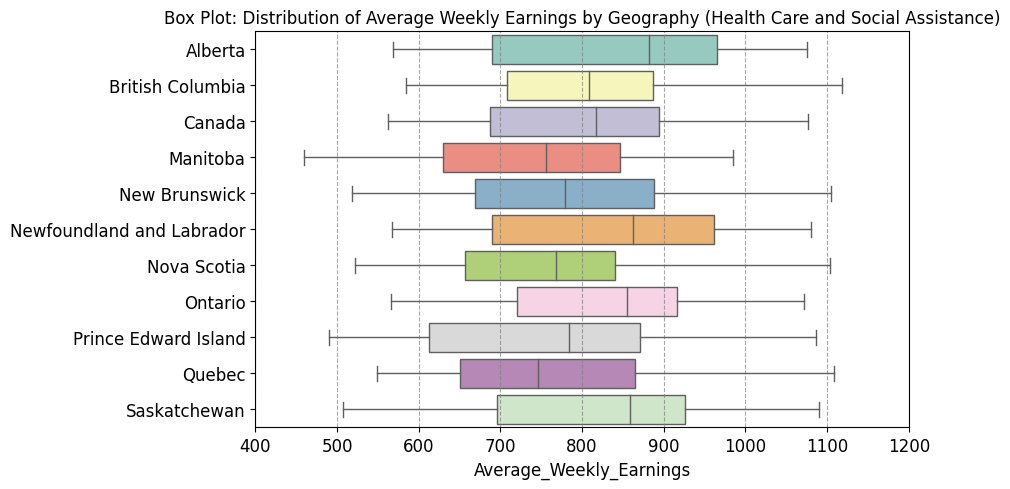

In [16]:
# Import the necessary libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes with a specified size for the box plot
fig, ax = plt.subplots(figsize=(9.5, 5))

# Generate a box plot to visualize the distribution of average weekly earnings by geography
sns.boxplot(y='Geography', x='Average_Weekly_Earnings', data=df_weekly_earnings_health, palette='Set3', ax=ax)

# Set labels and title for the plot
ax.set(ylabel='',  # No label for the y-axis
       title='Box Plot: Distribution of Average Weekly Earnings by Geography (Health Care and Social Assistance)',
       xlim=[400, 1200])  # Setting the x-axis limit for better visualization

# Add grid lines only for the x-axis to improve readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Display the plot with a tight layout for better presentation
plt.tight_layout()

Here's a breakdown of the key steps:

1. Creating a Figure and Axes with Specified Size:
   - A figure and axes are created using 'plt.subplots(figsize=(9.5, 5)).' The 'figsize' parameter sets the size of the figure in inches.

1. Creating a Box Plot with Seaborn:
   - A box plot is generated using 'sns.boxplot().'
   - 'y' is set to 'Geography,' specifying that the 'Geography' column from the 'df_weekly_earnings_health' DataFrame should be represented on the y-axis.
   - 'x' is set to 'Average_Weekly_Earnings,' indicating that the 'Average_Weekly_Earnings' column should be represented on the x-axis.
   - 'data' specifies the DataFrame containing the data.
   - 'palette' sets the color palette for the box plots to 'Set3.'
   - 'ax' specifies the axes where the plot should be drawn.

1. Setting Labels and Title:
   - The 'ax.set()' method is used to set labels for the y-axis and provide a title for the plot.
   - 'ylabel' is set to an empty string ('') to remove the y-axis label.
   - 'title' sets the title of the plot.
   - 'xlim' sets the limits for the x-axis to [400, 1200].

1. Adding Grid Lines to the X-Axis:
   - Grid lines are added to the x-axis using 'ax.xaxis.grid(True, linestyle='--', alpha=0.7).' This helps in better visualizing the data by providing reference lines.

1. Showing the Plot with Tight Layout:
   - 'plt.tight_layout()' is called to ensure a tight layout, improving the plot's appearance by avoiding overlapping elements.

**Box Plots:**

Box plots, also known as box-and-whisker plots, are a graphical representation of the distribution of a dataset. They provide a concise summary of the data's central tendency, dispersion, and the presence of outliers. Box plots are particularly useful for comparing multiple datasets or visualizing the spread of data across different categories.
A box plot consists of several elements:
    
1. **Box:** The box represents the interquartile range (IQR), which contains the middle 50% of the data. The bottom (lower) edge of the box marks the first quartile (Q1), and the top (upper) edge marks the third quartile (Q3). The length of the box indicates the spread or variability of the data in this range.

2. **Whiskers:** The whiskers extend from the edges of the box to the minimum and maximum values within a certain distance from the quartiles. The length of the whiskers is typically 1.5 times the IQR. Data points beyond the whiskers are considered outliers and are shown individually as points.

3. **Median:** The line inside the box represents the median (Q2) of the data, which is the middle value when the data is sorted in ascending order. It divides the data into two equal halves.

4. **Outliers:** Individual data points that lie beyond the whiskers are shown as separate points on the plot and are considered outliers.

Box plots are particularly useful for detecting the presence of outliers, identifying skewness in the data, and comparing the distribution of data across different categories or groups. They provide a clear visual representation of the spread and central tendency of the data and are valuable tools for exploratory data analysis.

## Violin Plot

A violin plot [Waskom, 2021] is a data visualization that combines elements of a box plot and a kernel density estimate (KDE) to show the distribution of a continuous numerical variable within different categories. It provides insights into the central tendency, variability, and the shape of the distribution, making it useful for comparing data distributions across different groups. Seaborn's `sns.violinplot()` function is specifically designed to create violin plots and allows for customization to enhance the visualization. Here's an explanation of how to use `sns.violinplot()`:

1. **Usage**: Violin plots are used to compare the distribution of a continuous numerical variable across different categories or groups. They provide a comprehensive view of the data's distribution, including central tendency, spread, multimodality, and potential outliers.

2. **Seaborn Library**: Seaborn is a Python data visualization library built on top of Matplotlib. `sns.violinplot()` is part of Seaborn's suite of plot functions.

3. **Syntax**: The basic syntax for creating a violin plot with Seaborn is: `sns.violinplot(x, y, data, hue)`. Here, `x` (or `y`) is the categorical variable to be plotted on the x-axis (or y-axis), `data` is the DataFrame containing the data, and `hue` (optional) allows you to differentiate violin plots based on another categorical variable. You can find the full function description [here](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

4. **Violin Plot Features**:
   - **Violin**: The main feature of a violin plot is the "violin" shape that displays the kernel density estimate (KDE) of the data's distribution within each category. The width of the violin represents the density of data points, and the wider regions indicate a higher density of data.
   - **Central Line**: Inside the violin, there is often a central line that represents the median of the data within each category, similar to a box plot.
   - **Interquartile Range (IQR)**: The width of the violin around the central line indicates the interquartile range (IQR), providing information about the spread of the data.
   - **Coloring (Hue)**: The `hue` parameter allows you to differentiate violin plots based on another categorical variable, creating grouped violin plots for each category within the original categories.

5. **Customization**: Seaborn provides various customization options for violin plots, such as setting colors, adding labels and titles, adjusting the appearance of the violins, and more.

6. **Interpretation**: When interpreting a violin plot, focus on the width of the violin (density of data points), the central line (median), the spread (width of the violin), the presence of multiple modes (if applicable), and the differences between violin plots for different categories (if using `hue`).

7. **Data Preparation**: Ensure that the data is properly formatted for the violin plot. Handle missing values, encode categorical variables appropriately, and ensure that the variables being plotted on the x-axis and y-axis are suitable for a violin plot.

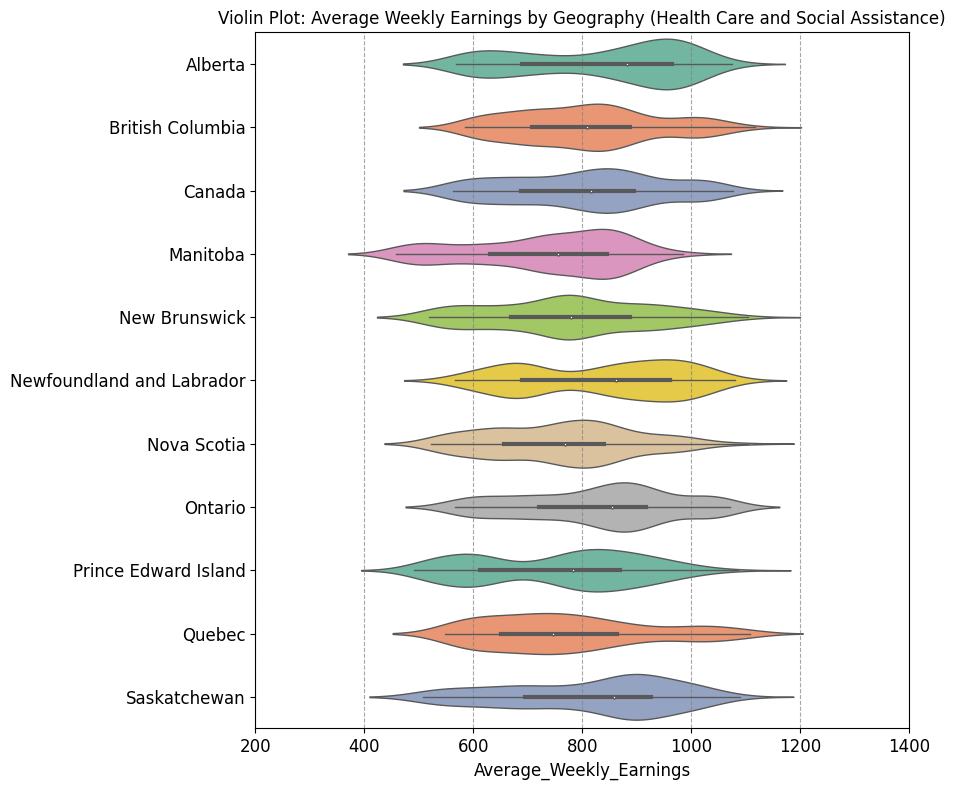

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(9.5, 8))

# Create a violin plot with a specified color palette
sns.violinplot(y='Geography', x='Average_Weekly_Earnings', data=df_weekly_earnings_health, palette='Set2', ax=ax)

# Set labels and title
ax.set(ylabel='', title='Violin Plot: Average Weekly Earnings by Geography (Health Care and Social Assistance)',
       xlim=[200, 1400])

# Add grid lines only for the x-axis
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Show the plot with tight layout
plt.tight_layout()

Here's a breakdown of the key steps:

1. Creating a Figure and Axes with a Specified Size:
   - A figure and axes are created using 'plt.subplots(figsize=(9.5, 8)).' The 'figsize' parameter sets the size of the figure in inches.

1. Creating a Violin Plot with Seaborn:
   - A violin plot is generated using 'sns.violinplot().'
   - 'y' is set to 'Geography,' specifying that the 'Geography' column from the 'df_weekly_earnings_health' DataFrame should be represented on the y-axis.
   - 'x' is set to 'Average_Weekly_Earnings,' indicating that the 'Average_Weekly_Earnings' column should be represented on the x-axis.
   - 'data' specifies the DataFrame containing the data.
   - 'palette' sets the color palette for the violin plots to 'Set2.'
   - 'ax' specifies the axes where the plot should be drawn.

1. Setting Labels and Title:
   - The 'ax.set()' method is used to set labels for the y-axis and provide a title for the plot.
   - 'ylabel' is set to an empty string ('') to remove the y-axis label.
   - 'title' sets the title of the plot.
   - 'xlim' sets the limits for the x-axis to [200, 1400].

1. Adding Grid Lines to the X-Axis:
   - Grid lines are added to the x-axis using 'ax.xaxis.grid(True, linestyle='--', alpha=0.7).' This helps in better visualizing the data by providing reference lines.

1. Showing the Plot with Tight Layout:
   - 'plt.tight_layout()' is called to ensure a tight layout, improving the plot's appearance by avoiding overlapping elements.

***

**Violin Plots**

A violin plot is a type of data visualization that combines aspects of a box plot and a kernel density plot. It is used to display the distribution of data for different categories or groups. The plot consists of one or more "violins," each representing a group of data points. Each violin represents the density of the data within a specific range.

Here's a breakdown of the key components of a violin plot:
1. **Violin Body:** The central part of the violin plot is called the "violin body." It resembles a mirrored kernel density plot, showing the data density along the y-axis. Wider sections of the violin indicate higher data density, while narrower sections indicate lower density.

2. **Interquartile Range (IQR):** Inside the violin, a thick horizontal line represents the interquartile range (IQR) of the data. The IQR spans from the first quartile (Q1) to the third quartile (Q3) and contains the middle 50% of the data.

3. **Median Line:** A vertical line inside the violin represents the median value of the data.

4. **Extremes and Outliers:** The "whiskers" of the violin plot extend from the ends of the IQR to the minimum and maximum values within a certain range. Data points beyond these whiskers are considered "outliers" and are plotted individually as points outside the violin.

Violin plots are particularly useful when comparing the distribution of multiple datasets or groups. They provide insights into the shape of the data distribution, skewness, multimodality, and the presence of outliers.

***

## Heatmap

A heatmap [Waskom, 2021] is a popular data visualization technique that uses colors to represent numerical values in a matrix-like format. It's particularly useful for visualizing relationships, patterns, and distributions within a dataset, especially when dealing with two-dimensional data. Seaborn's `sns.heatmap()` function is designed to create heatmaps easily, and it offers customization options for enhanced visualization. Here's an explanation of how to use `sns.heatmap()`:

1. **Usage**: Heatmaps are used to display a matrix of numerical values where each value is represented by a color. They are commonly used to show correlations, patterns, or distributions in datasets with two dimensions (e.g., a matrix of data points).

2. **Seaborn Library**: Seaborn is a Python data visualization library built on top of Matplotlib. `sns.heatmap()` is part of Seaborn's collection of plot functions.

3. **Syntax**: The basic syntax for creating a heatmap with Seaborn is: `sns.heatmap(data, annot, cmap)`. Here, `data` is the two-dimensional array or DataFrame containing the numerical values, `annot` (optional) controls whether to annotate the heatmap cells with the actual values, and `cmap` (optional) specifies the color map to be used for the heatmap. You can find the full function description [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

4. **Heatmap Features**:
   - **Color Mapping**: Each cell in the heatmap represents a numerical value, and the color of the cell is determined by a color map (`cmap`) that maps the values to colors. You can choose a color map that best suits your data and visualization needs.
   - **Annotation**: The `annot` parameter allows you to display the actual numerical values within the cells of the heatmap, providing additional information and making it easier to interpret the visualization.

5. **Customization**: Seaborn's `sns.heatmap()` offers customization options, such as adjusting the color map, adding labels and titles, setting axis ticks, adjusting plot aesthetics, and more.

6. **Interpretation**: When interpreting a heatmap, focus on the color variations, which indicate the relative magnitude of the numerical values. Look for patterns, correlations, or clusters within the heatmap. If annotations are enabled, the actual values within each cell can provide additional context.

7. **Data Preparation**: Ensure that the data is well-structured for the heatmap. It should be in a matrix-like format, with rows and columns representing categories or variables and the cell values being the numerical data points to be visualized.

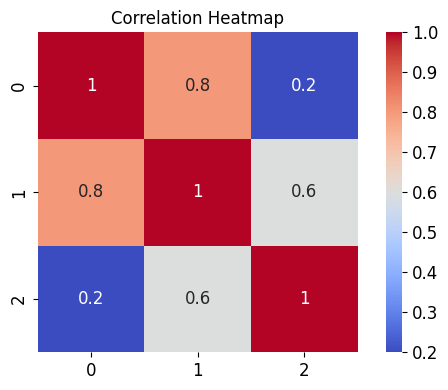

In [18]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
data = [[1, 0.8, 0.2],
        [0.8, 1, 0.6],
        [0.2, 0.6, 1]]

# Create a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(6, 4))

# Create a heatmap using Seaborn
# - 'data' is the correlation matrix to be visualized.
# - 'annot=True' displays the correlation values within the heatmap cells.
# - 'cmap='coolwarm'' sets the color map for the heatmap.
# - 'ax' specifies the axes where the heatmap should be drawn.
# - 'annot_kws' allows you to customize the font size of the annotations in the heatmap.
_ = sns.heatmap(data, annot=True, cmap='coolwarm', ax=ax, annot_kws={"fontsize": 12})

# Set multiple properties using the Axes object
# - 'title' sets the title of the plot to 'Correlation Heatmap.'
# - 'aspect' ensures equal scaling for both axes, making the cells square.
_ = ax.set(title='Correlation Heatmap',
           aspect='equal')

# Turn off grid lines
_ = ax.grid(False)

# Ensure a tight layout for better presentation
plt.tight_layout()

Here's a breakdown of the key steps:

1. Creating a Correlation Matrix:
   - A correlation matrix is defined as 'data.' This matrix represents the correlations between variables and is typically square with ones on the diagonal since each variable correlates perfectly with itself.

1. Creating a Figure and Axes with a Specified Size:
   - A figure and axes are created using 'plt.subplots(figsize=(6, 4)).' The 'figsize' parameter sets the size of the figure in inches.

1. Creating the Heatmap Using Seaborn:
   - `sns.heatmap()` is used to create the heatmap.
   - 'data' is specified as the correlation matrix to be visualized.
   - 'annot=True' displays the correlation values within the heatmap cells.
   - 'cmap='coolwarm'' sets the color map for the heatmap, which uses cool and warm colors to represent positive and negative correlations, respectively.
   - 'ax' specifies the axes where the heatmap should be drawn.
   - 'annot_kws' allows you to customize the font size of the annotations in the heatmap. In this case, the font size is set to 12.

1. Setting Multiple Properties Using the Axes Object:
   - The 'ax.set()' method is used to set multiple properties for the plot.
   - 'title' is set to 'Correlation Heatmap' to provide a title for the plot.
   - 'aspect' is set to 'equal' to ensure that the cells of the heatmap are square, providing a more accurate representation of the correlation matrix.

1. Turning off Grid Lines:
   - `ax.grid(False)` is called to turn off grid lines in the plot, enhancing its clarity.

1. Ensuring a Tight Layout:
   - `plt.tight_layout()` is used to ensure a tight layout, which optimizes the spacing and arrangement of plot elements for better presentation.

***
Heatmap Plots

A Seaborn heatmap is a graphical representation of a 2D dataset in which individual values are represented as colors. It's a powerful tool for visualizing the relationships and patterns within the data, especially when dealing with numerical data and correlation matrices. Here's a detailed explanation of Seaborn's heatmap:

1. **Usage**: Heatmaps are commonly used to visualize matrices, including correlation matrices, confusion matrices, and any 2D data where the values have meaningful relationships.

2. **Color Mapping**: Heatmaps use a color scale to represent values in the dataset. By mapping colors to numerical values, it becomes easier to identify patterns, clusters, and variations in the data.

3. **Seaborn Library**: Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating informative and visually appealing statistical graphics, including heatmaps.

4. **Syntax**: The basic syntax for creating a heatmap in Seaborn is: `sns.heatmap(data, annot, cmap, center, linewidths)`. Here, `data` is the 2D dataset you want to visualize, `annot` (optional) controls whether to annotate each cell with its value, `cmap` specifies the color palette, `center` (optional) defines the center value of the color map, and `linewidths` (optional) adds space between cells.

5. **Color Palette**: The choice of color palette (`cmap`) is crucial. It affects the visual representation of the data. Seaborn provides various built-in color palettes, such as "coolwarm," "viridis," "cividis," "plasma," "hot," and more. Choose a palette that suits the data and emphasizes the patterns you're interested in.

6. **Annotating Cells**: The `annot` parameter allows you to display the actual values of each cell within the heatmap. This can be useful for understanding the dataset at a glance, especially when dealing with correlation matrices or other matrices where the exact values matter.

7. **Center Value**: The `center` parameter lets you set a specific value around which the colors are centered. This is particularly helpful when you want to emphasize positive and negative deviations from a particular value.

8. **Interpretation**: When interpreting a heatmap, look for clusters of similar colors, which indicate groups or patterns within the data. Pay attention to the color scale's legend to understand the correspondence between colors and values. Also, consider any annotations present within the cells, especially when exploring correlation or similarity matrices.

9. **Customization**: Seaborn allows you to customize the appearance of the heatmap, such as adjusting the color scale, annotating cells with different formatting, and modifying the plot's aesthetics.

10. **Data Preparation**: Ensure that the data is appropriately organized and cleaned before creating a heatmap. Heatmaps work best with structured

***